In [1]:
import pandas as pd
import pandas as pd
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
import category_encoders as ce
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans


# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# from keras.models import Sequential, load_model, Model
# from keras.applications.vgg16 import VGG16
# from keras.applications.densenet import DenseNet169, DenseNet121
# from keras.applications.resnet import ResNet50

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
data = pd.read_csv('/kaggle/input/consumerbehaviour/data.csv')

In [3]:
# handle missing  values
data = data.dropna() 

In [4]:
data.head()

,age,gender,isMarried,race,religion,color,priceRange,district,imagePath
0,30-35,male,True,Tamil,Hindu,Cream,0-2000,Kandy,4
1,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2
2,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
3,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
4,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2


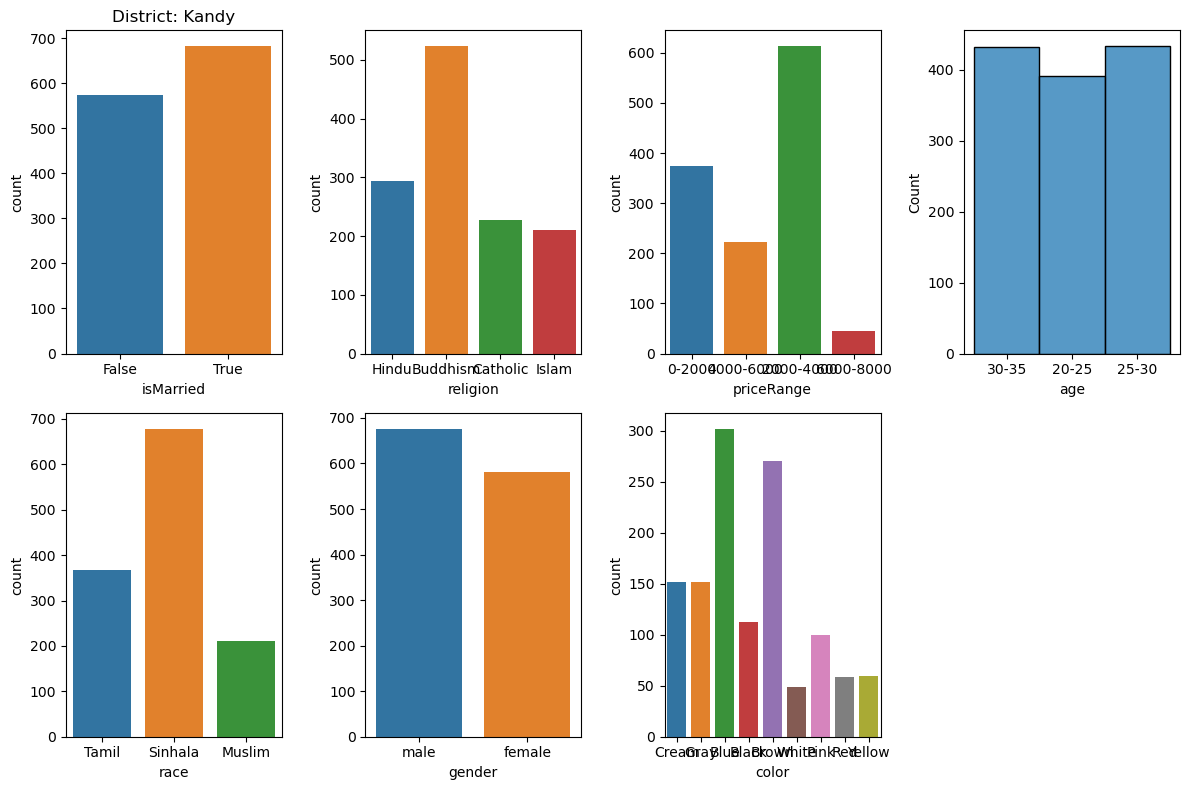

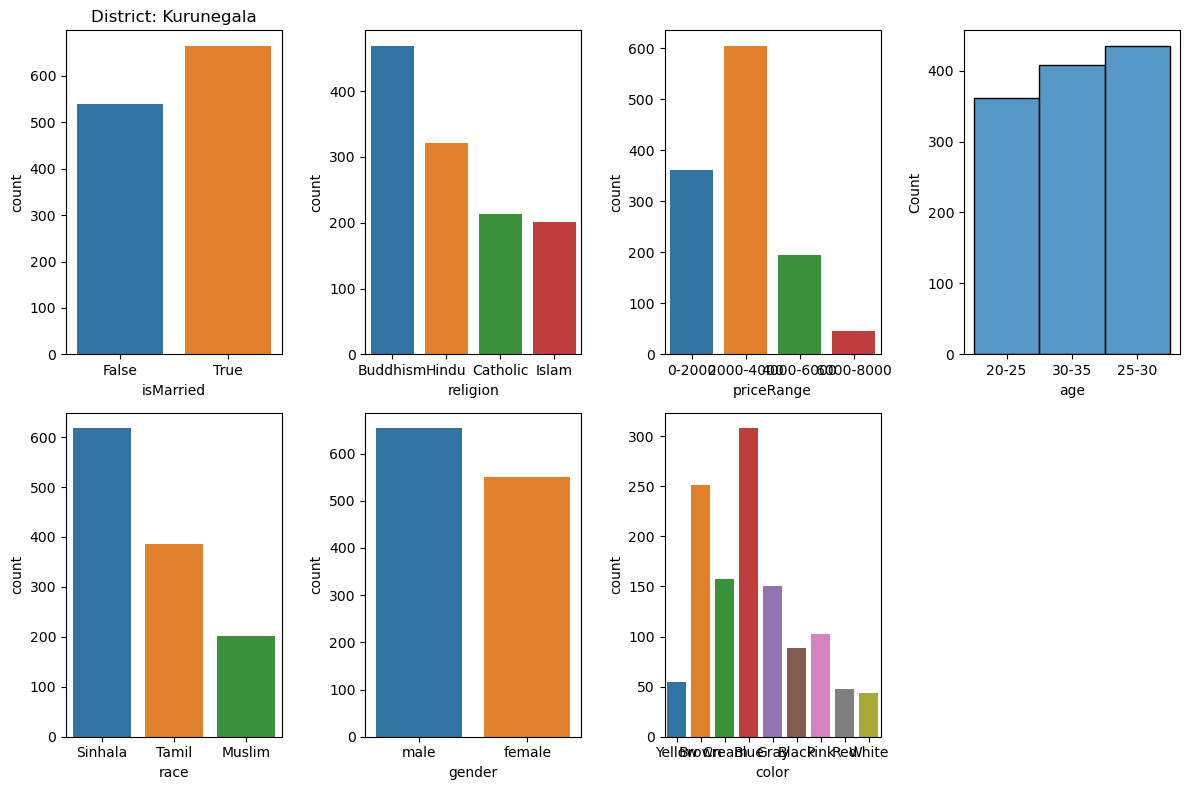

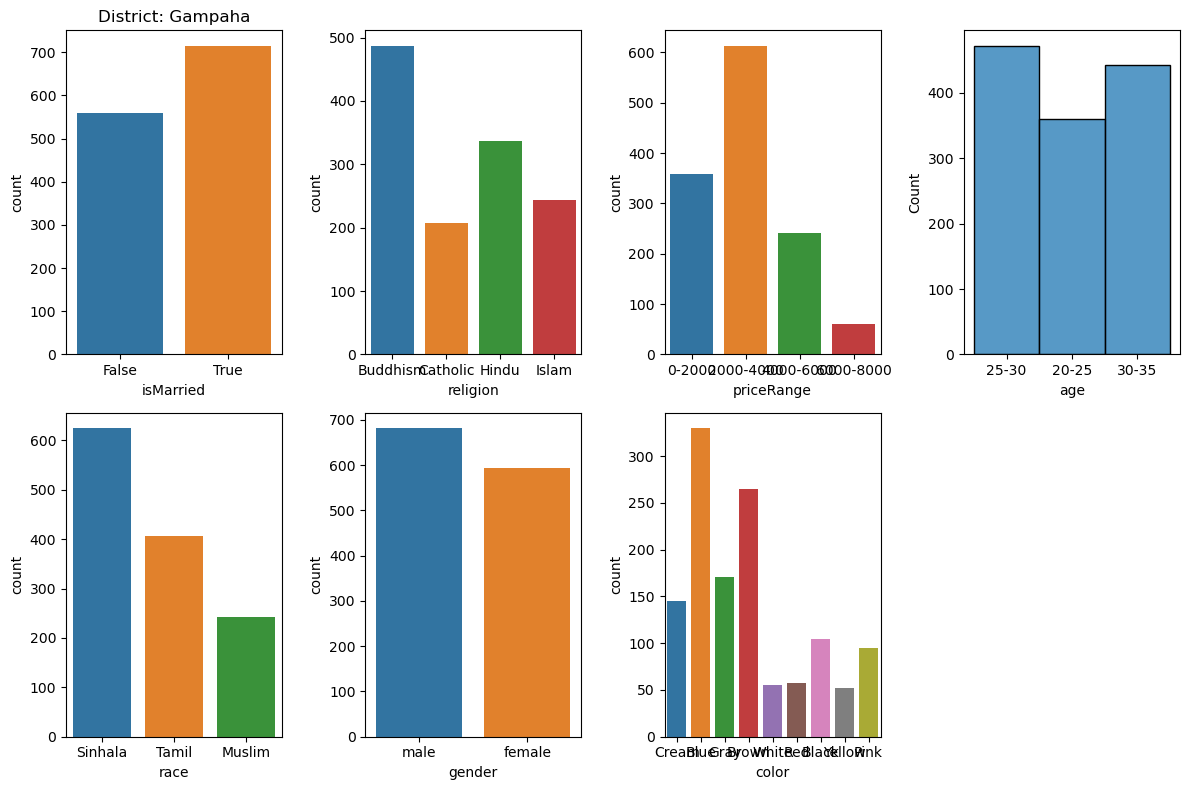

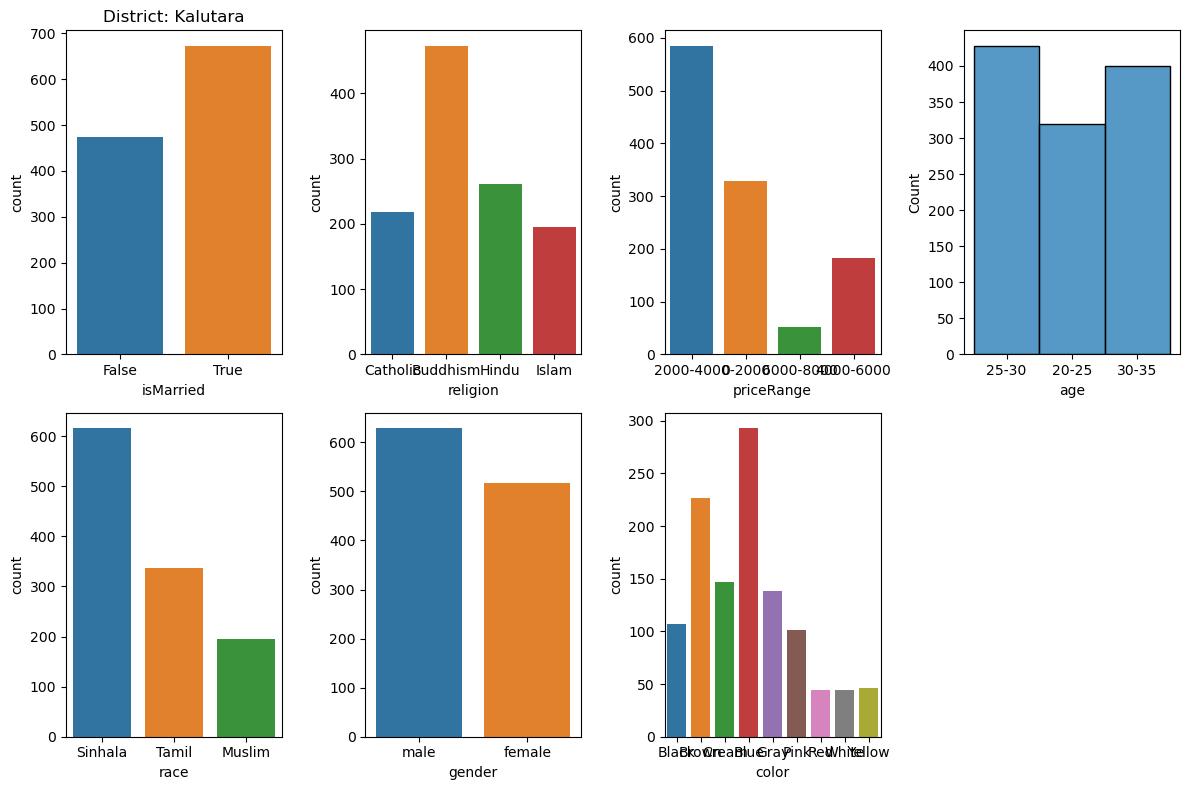

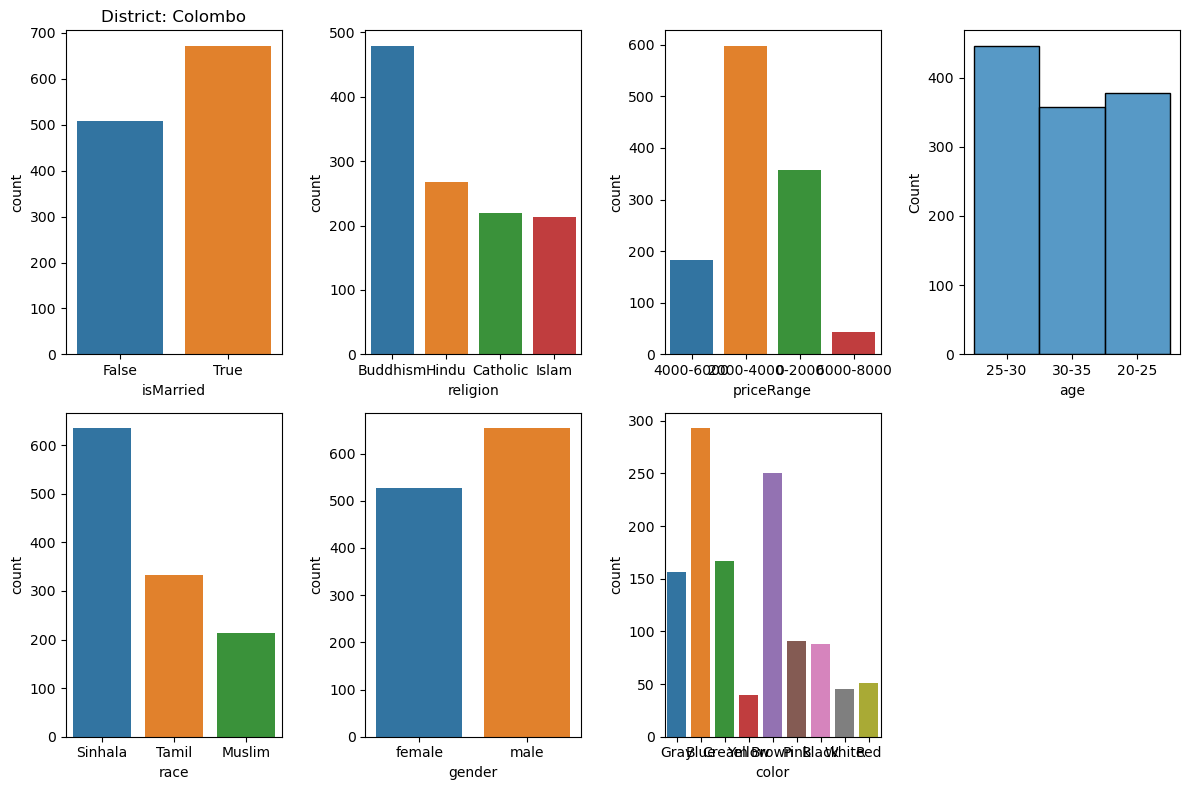

In [5]:
# Create bar plots for categorical columns
for district_value in data['district'].unique():
    # Create a subplot for each district
    plt.figure(figsize=(12, 8))
    
    # Filter the data for the current district
    district_data = data[data['district'] == district_value]
    
    # Plot 'isMarried' distribution
    plt.subplot(2, 4, 1)
    sns.countplot(data=district_data, x='isMarried')
    plt.title(f'District: {district_value}')
    
    # Plot 'religion' distribution
    plt.subplot(2, 4, 2)
    sns.countplot(data=district_data, x='religion')
    
    # Plot 'priceRange' distribution
    plt.subplot(2, 4, 3)
    sns.countplot(data=district_data, x='priceRange')
    
    # Plot 'age' distribution
    plt.subplot(2, 4, 4)
    sns.histplot(data=district_data, x='age', bins=10)
    
    # Plot 'race' distribution
    plt.subplot(2, 4, 5)
    sns.countplot(data=district_data, x='race')
    
    # Plot 'gender' distribution
    plt.subplot(2, 4, 6)
    sns.countplot(data=district_data, x='gender')
    
    # Plot 'color' distribution
    plt.subplot(2, 4, 7)
    sns.countplot(data=district_data, x='color')
    
    plt.tight_layout()
    plt.show()

In [6]:
ce_be = ce.BinaryEncoder(cols=['race'])
# transform the data
data_binary = ce_be.fit_transform(data["race"]);
data_binary

,race_0,race_1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6060,1,0
6061,1,0
6062,1,0
6063,0,1


In [7]:
ce_be = ce.BinaryEncoder(cols=['race'])
# transform the data
data_binary = ce_be.fit_transform(data["race"]);
data_binary

,race_0,race_1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
6060,1,0
6061,1,0
6062,1,0
6063,0,1


In [8]:
newdata = pd.get_dummies(data,columns=[ 'age','gender','isMarried','race','religion',	'color','priceRange','district'])

In [9]:
newdata.head()

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,color_Yellow,priceRange_0-2000,priceRange_2000-4000,priceRange_4000-6000,priceRange_6000-8000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,4,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1


In [10]:
column_names = newdata.columns.tolist()
print(column_names)

['imagePath', 'age_20-25', 'age_25-30', 'age_30-35', 'gender_female', 'gender_male', 'isMarried_False', 'isMarried_True', 'race_Muslim', 'race_Sinhala', 'race_Tamil', 'religion_Buddhism', 'religion_Catholic', 'religion_Hindu', 'religion_Islam', 'color_Black', 'color_Blue', 'color_Brown', 'color_Cream', 'color_Gray', 'color_Pink', 'color_Red', 'color_White', 'color_Yellow', 'priceRange_0-2000', 'priceRange_2000-4000', 'priceRange_4000-6000', 'priceRange_6000-8000', 'district_Colombo', 'district_Gampaha', 'district_Kalutara', 'district_Kandy', 'district_Kurunegala']


In [11]:
bool_columns = newdata.select_dtypes(include=['bool']).columns
print(bool_columns)

Index([], dtype='object')


In [12]:
newdata[bool_columns] = newdata[bool_columns].applymap(lambda x: 1 if x else 0)

In [13]:
newdata.head()

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,color_Yellow,priceRange_0-2000,priceRange_2000-4000,priceRange_4000-6000,priceRange_6000-8000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,4,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1


In [14]:
newdata.columns

Index(['imagePath', 'age_20-25', 'age_25-30', 'age_30-35', 'gender_female',
       'gender_male', 'isMarried_False', 'isMarried_True', 'race_Muslim',
       'race_Sinhala', 'race_Tamil', 'religion_Buddhism', 'religion_Catholic',
       'religion_Hindu', 'religion_Islam', 'color_Black', 'color_Blue',
       'color_Brown', 'color_Cream', 'color_Gray', 'color_Pink', 'color_Red',
       'color_White', 'color_Yellow', 'priceRange_0-2000',
       'priceRange_2000-4000', 'priceRange_4000-6000', 'priceRange_6000-8000',
       'district_Colombo', 'district_Gampaha', 'district_Kalutara',
       'district_Kandy', 'district_Kurunegala'],
      dtype='object')

In [15]:
from tqdm import tqdm


In [16]:
newdata

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,color_Yellow,priceRange_0-2000,priceRange_2000-4000,priceRange_4000-6000,priceRange_6000-8000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,4,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,4,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6061,4,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
6062,21,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
6063,14,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [17]:
new_df = newdata.iloc[::2]

print(new_df.head())


   imagePath  age_20-25  age_25-30  age_30-35  gender_female  gender_male  \
0          4          0          0          1              0            1   
2          1          1          0          0              0            1   
4          2          1          0          0              0            1   
6          8          0          1          0              0            1   
8         21          0          0          1              1            0   

   isMarried_False  isMarried_True  race_Muslim  race_Sinhala  ...  \
0                0               1            0             0  ...   
2                1               0            0             1  ...   
4                1               0            0             1  ...   
6                0               1            0             1  ...   
8                0               1            0             0  ...   

   color_Yellow  priceRange_0-2000  priceRange_2000-4000  \
0             0                  1                     0

In [22]:
new_df['imagePath']

0        4
2        1
4        2
6        8
8       21
        ..
6056    22
6058    12
6060     4
6062    21
6064     7
Name: imagePath, Length: 3033, dtype: int64

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
newdata

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,color_Yellow,priceRange_0-2000,priceRange_2000-4000,priceRange_4000-6000,priceRange_6000-8000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,4,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060,4,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6061,4,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
6062,21,0,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
6063,14,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [33]:
# Identify and remove duplicate rows
df_updated = data.drop_duplicates()

# Reset the row index
df_updated.reset_index(drop=True, inplace=True)

# Print the DataFrame with reset index
print(df_updated)

       age  gender  isMarried     race  religion   color priceRange  \
0    30-35    male       True    Tamil     Hindu   Cream     0-2000   
1    20-25    male      False  Sinhala  Buddhism  Yellow     0-2000   
2    20-25    male      False  Sinhala  Buddhism   Brown     0-2000   
3    25-30    male       True  Sinhala  Buddhism   Cream     0-2000   
4    25-30    male       True  Sinhala  Catholic   Black  2000-4000   
..     ...     ...        ...      ...       ...     ...        ...   
790  20-25    male       True  Sinhala  Buddhism    Blue  2000-4000   
791  25-30  female       True  Sinhala  Buddhism   Brown  2000-4000   
792  20-25    male       True    Tamil  Catholic    Blue  2000-4000   
793  25-30  female       True    Tamil     Hindu     Red  4000-6000   
794  25-30  female       True    Tamil  Catholic    Pink     0-2000   

       district  imagePath  
0         Kandy          4  
1    Kurunegala          2  
2    Kurunegala          1  
3       Gampaha          4  
4 

In [63]:
new_data_two = pd.get_dummies(df_updated,columns=[ 'age','gender','isMarried','race','religion','color','priceRange','district'])

In [64]:
bool_columns_two = new_data_two.select_dtypes(include=['bool']).columns
print(bool_columns_two)

Index([], dtype='object')


In [65]:
new_data_two

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,color_Yellow,priceRange_0-2000,priceRange_2000-4000,priceRange_4000-6000,priceRange_6000-8000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,4,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2,1,0,0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,8,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,5,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
791,19,0,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
792,5,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
793,22,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
new_data_two[bool_columns_two] = new_data_two[bool_columns_two].applymap(lambda x: 1 if x else 0)

In [67]:
batch_size = 10
total_images = new_data_two.shape[0]
num_batches = total_images // batch_size

train_images = []

for batch_idx in tqdm(range(num_batches)):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, total_images)  # Ensure end_idx doesn't go beyond total_images

    batch_images = []
    for i in range(start_idx, end_idx):
        img_path = '/kaggle/input/consumerbehaviour/images/images/' + str(new_data_two['imagePath'][i]) + '.jpg'
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(400, 400, 3))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255
        batch_images.append(img)

    train_images.extend(batch_images)
    print('Batch', batch_idx, 'processed')

# Process the remaining images (if any) that didn't fit into complete batches
if total_images % batch_size != 0:
    remaining_images = total_images % batch_size
    start_idx = num_batches * batch_size
    end_idx = start_idx + remaining_images

    remaining_batch = []
    for i in range(start_idx, end_idx):
        img_path = '/kaggle/input/consumerbehaviour/images/images/' + str(new_data_two['imagePath'][i]) + '.jpg'
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(400, 400, 3))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255
        remaining_batch.append(img)

    train_images.extend(remaining_batch)
    print('Remaining images processed')

X = np.array(train_images)


  3%|▎         | 2/79 [00:00<00:04, 15.81it/s]

Batch 0 processed
Batch 1 processed
Batch 2 processed


  8%|▊         | 6/79 [00:00<00:05, 14.14it/s]

Batch 3 processed
Batch 4 processed
Batch 5 processed


 13%|█▎        | 10/79 [00:00<00:04, 15.93it/s]

Batch 6 processed
Batch 7 processed
Batch 8 processed
Batch 9 processed


 18%|█▊        | 14/79 [00:00<00:04, 15.51it/s]

Batch 10 processed
Batch 11 processed
Batch 12 processed
Batch 13 processed


 23%|██▎       | 18/79 [00:01<00:03, 16.48it/s]

Batch 14 processed
Batch 15 processed
Batch 16 processed
Batch 17 processed


 28%|██▊       | 22/79 [00:01<00:03, 16.87it/s]

Batch 18 processed
Batch 19 processed
Batch 20 processed
Batch 21 processed


 33%|███▎      | 26/79 [00:01<00:03, 16.82it/s]

Batch 22 processed
Batch 23 processed
Batch 24 processed
Batch 25 processed


 38%|███▊      | 30/79 [00:01<00:02, 16.79it/s]

Batch 26 processed
Batch 27 processed
Batch 28 processed
Batch 29 processed


 43%|████▎     | 34/79 [00:02<00:02, 16.71it/s]

Batch 30 processed
Batch 31 processed
Batch 32 processed
Batch 33 processed


 48%|████▊     | 38/79 [00:02<00:02, 15.97it/s]

Batch 34 processed
Batch 35 processed
Batch 36 processed
Batch 37 processed


 51%|█████     | 40/79 [00:02<00:02, 15.42it/s]

Batch 38 processed
Batch 39 processed
Batch 40 processed


 56%|█████▌    | 44/79 [00:02<00:02, 14.92it/s]

Batch 41 processed
Batch 42 processed
Batch 43 processed
Batch 44 processed


 61%|██████    | 48/79 [00:03<00:02, 14.67it/s]

Batch 45 processed
Batch 46 processed
Batch 47 processed


 66%|██████▌   | 52/79 [00:03<00:01, 15.21it/s]

Batch 48 processed
Batch 49 processed
Batch 50 processed
Batch 51 processed


 71%|███████   | 56/79 [00:03<00:01, 15.73it/s]

Batch 52 processed
Batch 53 processed
Batch 54 processed
Batch 55 processed


 76%|███████▌  | 60/79 [00:03<00:01, 15.36it/s]

Batch 56 processed
Batch 57 processed
Batch 58 processed
Batch 59 processed


 81%|████████  | 64/79 [00:04<00:00, 15.94it/s]

Batch 60 processed
Batch 61 processed
Batch 62 processed
Batch 63 processed


 84%|████████▎ | 66/79 [00:04<00:00, 15.17it/s]

Batch 64 processed
Batch 65 processed
Batch 66 processed


 89%|████████▊ | 70/79 [00:04<00:00, 14.53it/s]

Batch 67 processed
Batch 68 processed
Batch 69 processed


 94%|█████████▎| 74/79 [00:04<00:00, 15.07it/s]

Batch 70 processed
Batch 71 processed
Batch 72 processed
Batch 73 processed


 99%|█████████▊| 78/79 [00:05<00:00, 15.33it/s]

Batch 74 processed
Batch 75 processed
Batch 76 processed
Batch 77 processed


100%|██████████| 79/79 [00:05<00:00, 15.56it/s]


Batch 78 processed
Remaining images processed


In [68]:
X.shape

(795, 400, 400, 3)

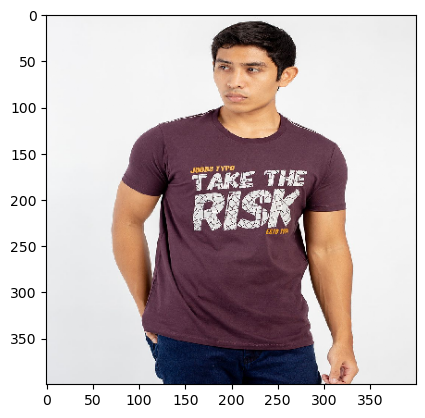

In [69]:
plt.imshow(X[2])

In [71]:
y = np.array(new_data_two.drop(['imagePath'],axis=1))
y.shape

(795, 32)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [73]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (795, 400, 400, 3)
y shape: (795, 32)


In [74]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [79]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400, 400, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))  # Update to 32 output neurons

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 396, 396, 16)      1216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 198, 198, 16)     0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 198, 198, 16)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 194, 194, 32)      12832     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 97, 97, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 97, 97, 32)       

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
12/12 [==============================] - 99s 8s/step - loss: 0.6705 - accuracy: 0.0503 - val_loss: 0.6444 - val_accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 96s 8s/step - loss: 0.6194 - accuracy: 0.0769 - val_loss: 0.6183 - val_accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 96s 8s/step - loss: 0.5976 - accuracy: 0.0811 - val_loss: 0.5990 - val_accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 96s 8s/step - loss: 0.5682 - accuracy: 0.0629 - val_loss: 0.5768 - val_accuracy: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 97s 8s/step - loss: 0.5553 - accuracy: 0.0476 - val_loss: 0.5558 - val_accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 96s 8s/step - loss: 0.5435 - accuracy: 0.0503 - val_loss: 0.5302 - val_accuracy: 0.0000e+00
Epoch 7/10
12/12 [==============================] - 96s 8s/step - loss: 0.5312 - accuracy: 0.0503 - val_loss: 0.5358 - val_accuracy: 0.0

In [85]:
from tensorflow.keras.preprocessing import image
import numpy as np

pred_img = image.load_img('/kaggle/input/consumerbehaviour/images/images/1.jpg',target_size=(400,400,3))
pred_img = image.img_to_array(pred_img)
pred_img = pred_img/255

1/1 [==============================] - 0s 166ms/step
gender_male (0.756)
priceRange_0-2000 (0.633)
isMarried_False (0.588)


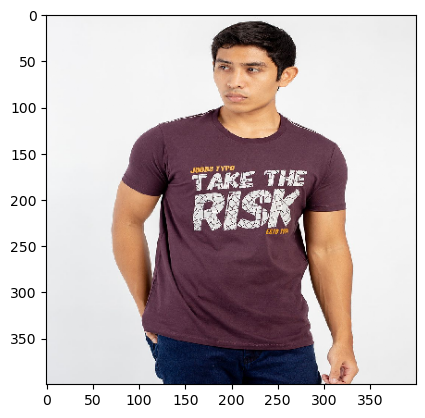

In [86]:
classes = np.array(new_data_two.columns[1:])
proba = model.predict(pred_img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(pred_img)

In [88]:
# Save the model to .h5 file
model.save('/kaggle/input/consumerbehaviour/images/behaviour.h5')